In [1]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [1]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))


In [6]:
stock_list.head()

,종목코드,종목명
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


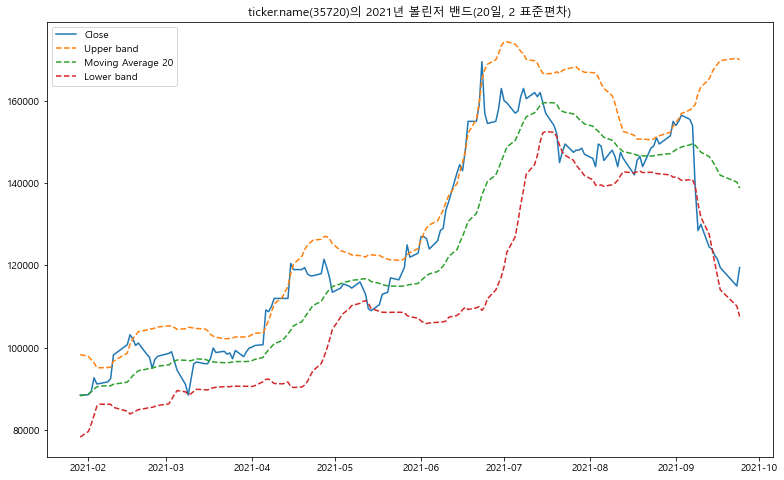

In [4]:
ticker = stock_list.loc[stock_list['종목명']=='카카오', '종목코드']
df = stock.get_market_ohlcv_by_date(fromdate="20210101", todate="20210924", ticker=ticker)


df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음


plt.figure(figsize=(13, 8))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{"ticker.name"}({int(ticker.values)})의 2021년 볼린저 밴드(20일, 2 표준편차)')
plt.legend(loc='best');
plt.show()